In [5]:
# Problem Set 3: Simulating the Spread of Disease and Virus Population Dynamics

import numpy
import random
import pylab

'''
Begin helper code
'''

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is, you do not need to
    modify/add any code.
    """

'''
End helper code
'''

#
# PROBLEM 2
#
class SimpleVirus(object):

    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.
        maxBirthProb: Maximum reproduction probability (a float between 0-1)
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """
        Returns the max birth probability.
        """
        return self.maxBirthProb

    def getClearProb(self):
        """
        Returns the clear probability.
        """
        return self.clearProb

    def doesClear(self):
        """ Stochastically determines whether this virus particle is cleared from the
        patient's body at a time step.
        returns: True with probability self.getClearProb and otherwise returns
        False.
        """
        return True if random.random() < self.clearProb else False

    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes. The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).

        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.

        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.
        """
        reproduce_prob = self.maxBirthProb * (1 - popDensity)
        if random.random() < reproduce_prob:
            return self
        else:
            raise NoChildException



class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.

        viruses: the list representing the virus population (a list of
        SimpleVirus instances)

        maxPop: the maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop

        # TODO

    def getViruses(self):
        """
        Returns the viruses in this Patient.
        """
        return self.viruses


    def getMaxPop(self):
        """
        Returns the max population.
        """
        return self.maxPop


    def getTotalPop(self):
        """
        Gets the size of the current total virus population.
        returns: The total virus population (an integer)
        """
        return len(self.viruses)

    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:

        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.

        - The current population density is calculated. This population density
          value is used until the next call to update()

        - Based on this value of population density, determine whether each
          virus particle should reproduce and add offspring virus particles to
          the list of viruses in this patient.

        returns: The total virus population at the end of the update (an
        integer)
        """
        # update v list based on death of viruses
        newv = [v for v in self.viruses if not v.doesClear()]
        # calculate population density
        curr_popDen = len(newv) / self.maxPop
        #offsprings = [v.reproduce(curr_popDen) for v in newv if v.reproduce(curr_popDen)]
        offsprings = []
        for v in newv:
            try:
                offsprings.append(v.reproduce(curr_popDen))
            except NoChildException:
                pass
        self.viruses = newv + offsprings


# v1 = SimpleVirus(0.5, 0.5)
# v2 = SimpleVirus(0.5, 0.5)
# v3 = SimpleVirus(0.5, 0.5)
# v4 = SimpleVirus(0.5, 0.5)

# print v1.doesClear(), v2.doesClear(), v3.doesClear(), v4.doesClear()

# p = Patient([v1,v2,v3,v4], 20)
# print len(p.viruses)
# p.update()
# print len(p.viruses)

#
# PROBLEM 3
#
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb,
                          numTrials):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """
    trial_results = []
    for i in range(numTrials):
        viruses = [SimpleVirus(maxBirthProb, clearProb) for _ in range(numViruses)]
        patient = Patient(viruses, maxPop)
        pop_over_time =[]
        for time in range(300):
            patient.update()
            nviruses = patient.getTotalPop()
            pop_over_time.append(nviruses)
        trial_results.append(pop_over_time)

    # calculate average over time from numTrials
    avgPop_over_time = [1.0 * sum(pop_at_time) / numTrials for pop_at_time in zip(*trial_results)]

    pylab.plot(range(300), avgPop_over_time)
    pylab.xlabel("Time")
    pylab.ylabel("Virus population")
    pylab.title("Average virus population over time (no drug)")
    pylab.legend("No drug")
    return avgPop_over_time

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


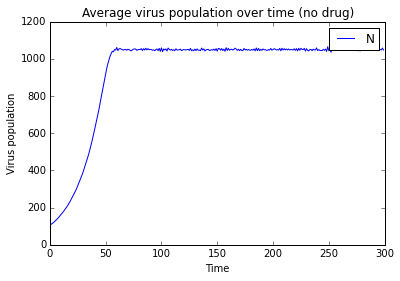

In [6]:
%pylab inline

r=simulationWithoutDrug(100, 1000, 0.1, 0.05, 50)

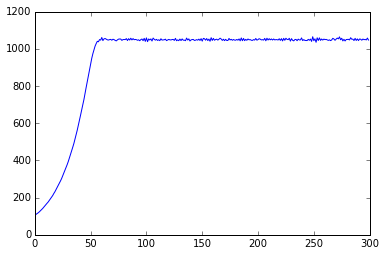

In [14]:
pylab.plot(r)
pylab.show()